In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
data0 = np.genfromtxt('MDA2_data/mda4_data.txt')
data = data0.T

In [4]:
data

array([[1., 1., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]])

In [5]:
def entropy(samples):
    uniq_samples, counts = np.unique(samples, axis = 0, return_counts = True)    
    freqs = counts / sum(counts)
    return (- sum(freqs*np.log2(freqs)))

In [6]:
entropy(data)

4.999701383484691

In [7]:
N = np.array([2**x for x in range(3,17,1)])
entr = np.empty(len(N))
for i,n in enumerate(N):
    entr[i] = entropy(data[:n])

(2.5, 6)

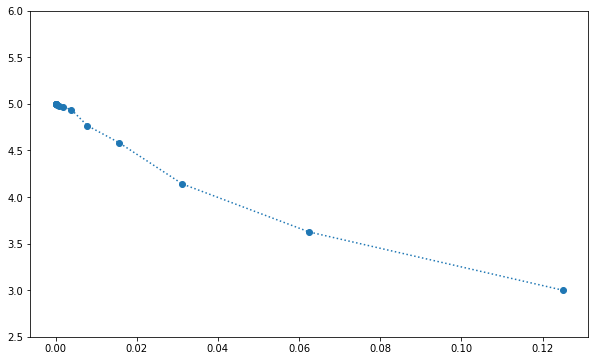

In [8]:
plt.figure(figsize = (10,6))
plt.plot(1/N, entr,':o')
plt.ylim(2.5,6)

### Many simulations!

In [9]:
def direct_entropy(sample, fractions, plot = False):
    x = np.around(len(sample)*fractions)
    curr_entr = np.empty(len(fractions))
    for i,f in enumerate(fractions):
        curr_entr[i] = entropy(sample[:int(np.around(len(sample)*f))])
    k,b = np.polyfit(1/x, curr_entr, 1)
    if plot:
        plt.plot(1/x, curr_entr, label = 'naive')
        plt.plot(1/x, k/x+b, label = 'linear fit')
        plt.legend()
        plt.xlim(0)
    return k,b, curr_entr, 1/x

In [10]:
fraction = np.array([1/x for x in range(1,11)])
direct_entropy(data, fraction)

(-16.99749252384301,
 4.9998392230304285,
 array([4.99970138, 4.99934947, 4.99916732, 4.99897059, 4.99851138,
        4.99795784, 4.99749467, 4.99762332, 4.99774813, 4.99760344]),
 array([1.52587891e-05, 3.05175781e-05, 4.57770657e-05, 6.10351562e-05,
        7.62951095e-05, 9.15499405e-05, 1.06814783e-04, 1.22070312e-04,
        1.37324911e-04, 1.52578578e-04]))

In [11]:
#N = np.array([2**x for x in range(3,17,1)])
N = [2**10,2**16]
Nsim = range(10)
fraction = np.array([1/x for x in np.arange(1,11, 1)])
ks = np.empty((len(Nsim), len(N)))
bs = np.empty((len(Nsim), len(N)))
entropies = np.empty((len(Nsim), len(N), len(fraction)))
xs = np.empty((len(N), len(fraction)))
np.random.seed(100)
for nsim in Nsim:
    np.random.shuffle(data)
    for i,n in enumerate(N):
        ks[nsim][i], bs[nsim][i], entropies[nsim][i], xs[i] = direct_entropy(data[:n], fraction)        

In [12]:
k_mean = np.empty(2)
b_mean = np.empty(2)
k_mean[1], b_mean[1] = np.polyfit(xs[1], np.mean(entropies[:,1], axis = 0), 1)
k_mean[0], b_mean[0] = np.polyfit(xs[0], np.mean(entropies[:,0], axis = 0), 1)

Text(0, 0.5, 'Entropy S, bits')

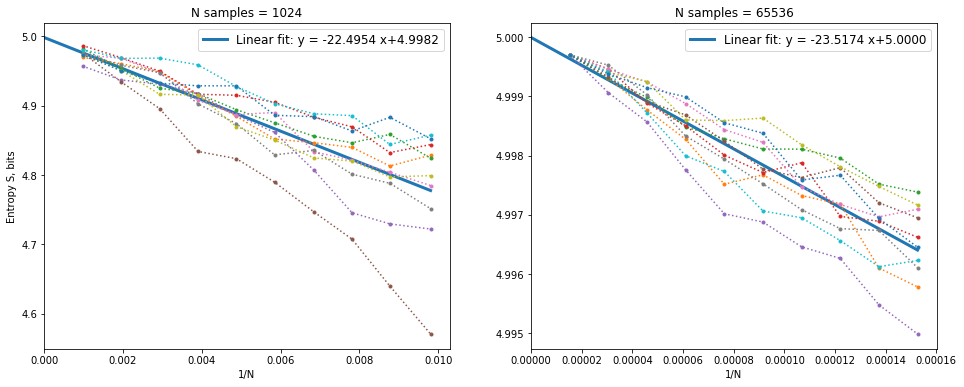

In [13]:
fig, ax = plt.subplots(1,2,figsize = (16,6))

for i in range(2):
    x = np.linspace(0,max(xs[i]),10)
    ax[i].set_title('N samples = {}'.format(N[i]))
    ax[i].plot(x, k_mean[i]*x + b_mean[i], label = 'Linear fit: y = {:.4f} x+{:.4f}'.format(k_mean[i], b_mean[i]), lw = 3)
    ax[i].legend(fontsize = 12)
    ax[i].set_xlim(0)
    ax[i].set_xlabel('1/N')
    for nsim in Nsim:
        ax[i].plot(xs[i],entropies[nsim][i], ':.')
ax[0].set_ylabel('Entropy S, bits')

In [35]:
N = np.array([2**x for x in range(3,17,1)])
Nsim = range(20)
fraction_all = np.array([1/x for x in np.arange(1,3,0.1)])
b_all = np.empty((len(Nsim), len(N)))
np.random.seed(100)
for nsim in Nsim:
    np.random.shuffle(data)
    for i,n in enumerate(N):
        _,b_all[nsim][i],_,_ = direct_entropy(data[:n], fraction_all)    

In [36]:
b_all_mean = np.mean(b_all, axis = 0)
b_all_std = np.std(b_all, axis = 0)

Text(0.5, 0, 'Sample size N')

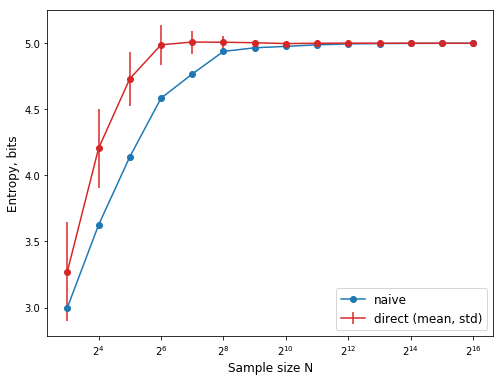

In [41]:
plt.figure(figsize = (8,6))
plt.plot(N, entr, 'o-', label = 'naive')
plt.errorbar(N, b_all_mean, yerr = b_all_std, color = 'tab:red', label = 'direct (mean, std)')
plt.plot(N, b_all_mean, 'o', color = 'tab:red')

plt.legend(fontsize = 12, loc = 4)
plt.xscale('log', basex = 2)
plt.ylabel('Entropy, bits', fontsize = 12)
plt.xlabel('Sample size N', fontsize = 12)
# plt.hlines(5, np.min(N), np.max(N), linestyle=':')